# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural net moduel
from keras.models import Sequential # create a linear stack of neural network layers.
from keras.layers import Dense, Dropout # is a module that provides various layer types, including Dense and Dropout, used to define the architecture of the neural network.
from keras.callbacks import EarlyStopping # callback is used to monitor the validation loss during training. If the validation loss stops improving for a specified number of epochs (in this case, 10), training is stopped early. This helps prevent overfitting

# Read in the data 


In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Preprocessing and cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# drop rows with missing values
df.dropna(axis=0, inplace=True)

In [7]:
df.shape

(20433, 10)

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


# Train test split

In [13]:
# Target variable is 'median_house_value'
y = df['median_house_value']
x = df.drop('median_house_value', axis=1)
print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


In [14]:
# convert to numpy array
x = np.array(x)
y = np.array(y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


# Scaling

In [16]:
# Use MinMax scaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [17]:
print(x_train)
print(x_test)

[[0.54425229 0.30180659 0.66666667 ... 0.06101974 0.21336947 0.25      ]
 [0.30315361 0.58448459 0.56862745 ... 0.00707237 0.27586516 0.25      ]
 [0.6948118  0.16790648 0.09803922 ... 0.25542763 0.25377581 0.25      ]
 ...
 [0.23601221 0.51328374 0.68627451 ... 0.05411184 0.2810375  0.        ]
 [0.19226857 0.55366631 1.         ... 0.06069079 0.26132053 0.75      ]
 [0.51068159 0.19978746 0.43137255 ... 0.12648026 0.29727866 0.5       ]]
[[0.71922686 0.02231668 0.43137255 ... 0.09769737 0.18199749 0.5       ]
 [0.30620549 0.64718385 0.45098039 ... 0.07976974 0.19436284 0.25      ]
 [0.3387589  0.54091392 0.74509804 ... 0.09917763 0.08313678 0.25      ]
 ...
 [0.15055951 0.62274176 0.76470588 ... 0.06973684 0.23342437 0.        ]
 [0.6103764  0.17534538 1.         ... 0.04276316 0.29645798 0.        ]
 [0.72227874 0.08926674 0.25490196 ... 0.13289474 0.31384395 0.        ]]


In [19]:
x_train.shape[1]

9

# Building  model (ANN)

In [33]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear') # here 1 shows countinuous value(regression) 
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 250)               125250    
                                                                 
 dense_11 (Dense)            (None, 1)                 251       
                                                                 
Total params: 636,001
Trainable params: 636,001
Non-tr

Total Parameters: The "Total params" section indicates that the model has a total of 636,001 parameters. These are the weights and biases that the model will learn during training.

Trainable Parameters: The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model's performance.

Non-trainable Parameters: The "Non-trainable params" section is typically 0, which means there are no parameters that won't be updated during training.

In [34]:
# Compile the model and set easlystoping
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50, restore_best_weights=True)

In [35]:
# fit the model (training)
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[es], epochs=10, batch_size=50, verbose=1)

Epoch 1/10
327/327 [==============================] - 7s 19ms/step - loss: 24388388864.0000 - mae: 119965.7734 - val_loss: 10522592256.0000 - val_mae: 81764.5391
Epoch 2/10
327/327 [==============================] - 6s 18ms/step - loss: 9308964864.0000 - mae: 76560.1719 - val_loss: 6976459264.0000 - val_mae: 63708.0664
Epoch 3/10
327/327 [==============================] - 6s 18ms/step - loss: 6368715264.0000 - mae: 60119.2539 - val_loss: 5632238592.0000 - val_mae: 55683.6992
Epoch 4/10
327/327 [==============================] - 6s 19ms/step - loss: 5919465984.0000 - mae: 56548.8125 - val_loss: 5483844096.0000 - val_mae: 53365.9258
Epoch 5/10
327/327 [==============================] - 6s 19ms/step - loss: 5733347840.0000 - mae: 55333.3594 - val_loss: 5339340288.0000 - val_mae: 54754.6289
Epoch 6/10
327/327 [==============================] - 6s 19ms/step - loss: 5532442624.0000 - mae: 54176.8906 - val_loss: 5190038528.0000 - val_mae: 53916.0586
Epoch 7/10
327/327 [=======================

# Metrics and Score

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :", r2_score(y_test,y_pred))

128/128 [==============================] - 1s 4ms/step
mae : 47758.295722336065
mse : 4498054360.101551
mae : 0.10705551804916344
score : 0.6491880522050141


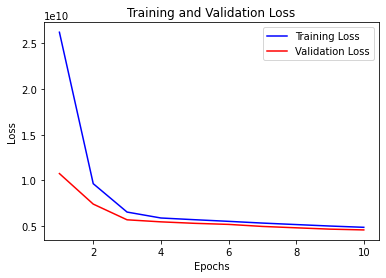

In [31]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

128/128 [==============================] - 1s 5ms/step


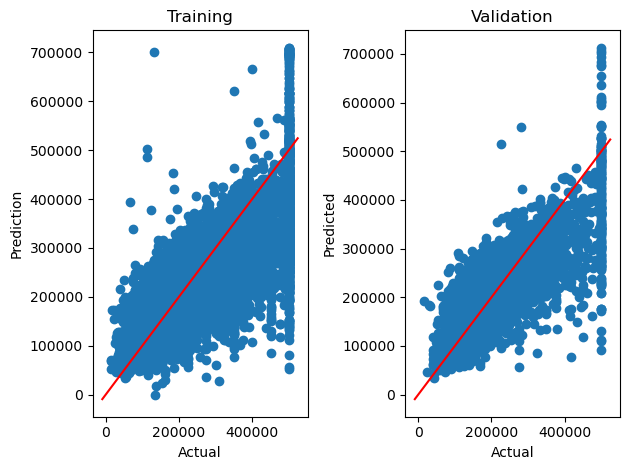

In [20]:
# Specify the dimensions 
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()


# Predictive System

In [47]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max_scaler.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]

In [48]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 [==============================] - 0s 29ms/step


In [49]:
price #  452600.0000 # actual value

array([269119.28], dtype=float32)

# Save model

In [51]:
model.save("model_ann.h5")

import pickle
pickle.dump(min_max_scaler,open('scaler.pkl','wb'))

# Check version and install the same in pycharm (in production)

In [52]:
import sklearn
import tensorflow as tf
import keras

print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


scikit-learn version: 1.2.2
TensorFlow version: 2.12.0
Keras version: 2.12.0
